# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data = pd.read_csv('CrabAgePrediction.csv')
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


Isi dari dataset adalah sebagai berikut :

1. Sex : Gender of crab (Male,Female and Infertebrata)
2. Length : Lenght of crab in
3. Diameter : Diameter of crab in
4. Height : Height of crab in
5. Weight : Weight of crab in
6. Shucked Weight : Weight of crab without shell
7. Viscera Weight : Weight that wraps around your abdominal organs deep inside body
8. Shell Weight : Weight of shell
9. Age : Age of crab in months



In [3]:
data_duplicate = data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Terlihat data tidak memiliki missing value, dan data terdiri dari object, float dan integer.

In [5]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Melihat mean, median, min dan max dari dataset.

# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<Figure size 1440x360 with 0 Axes>

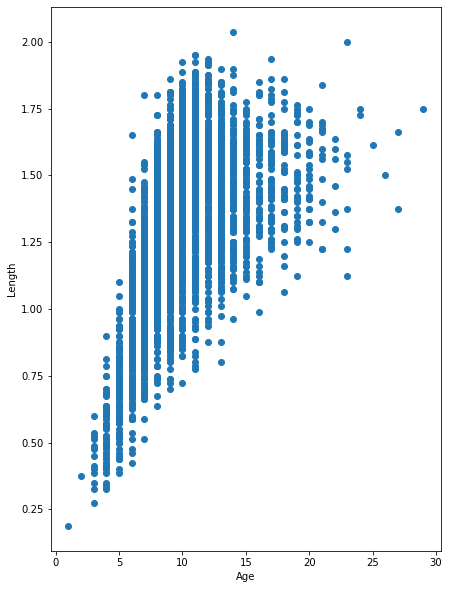

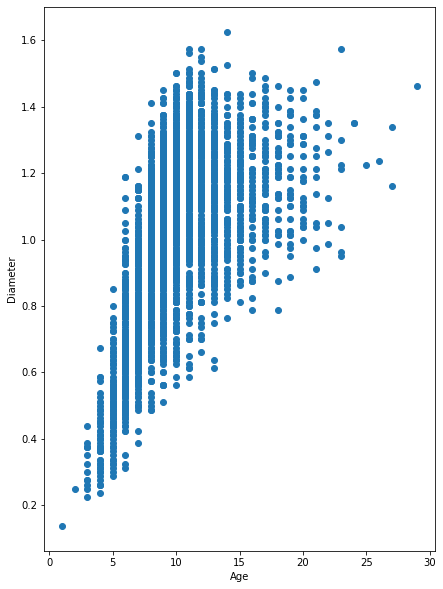

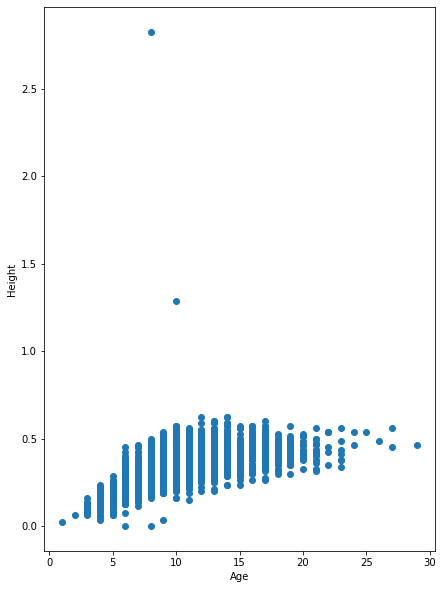

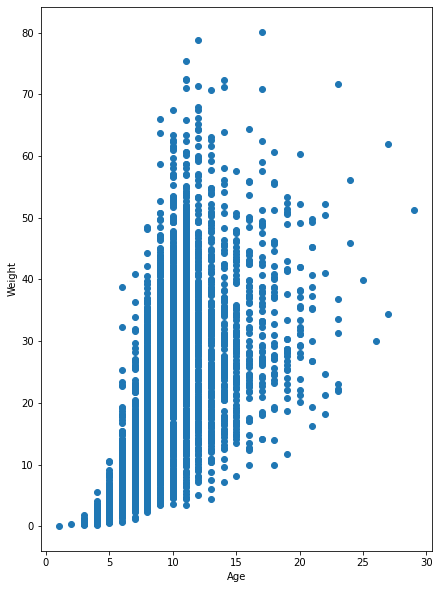

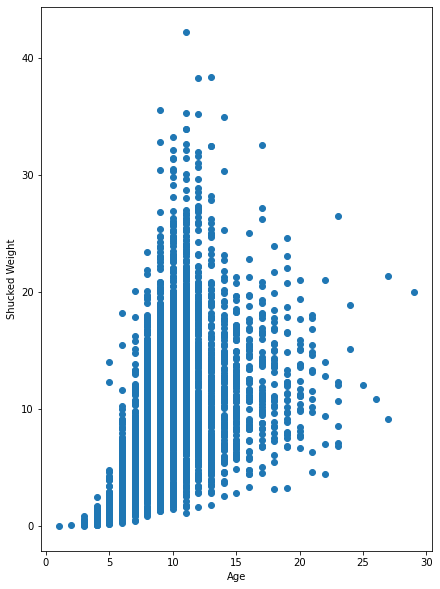

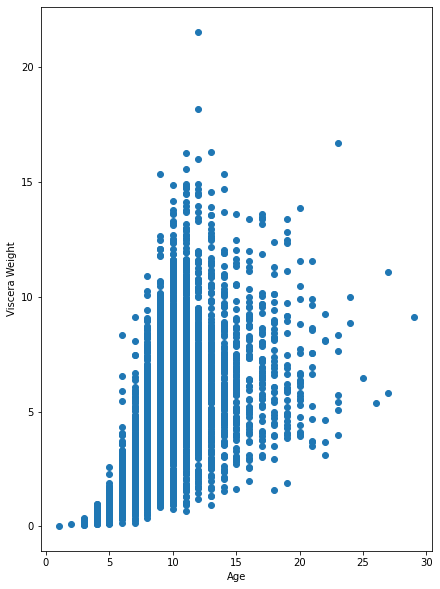

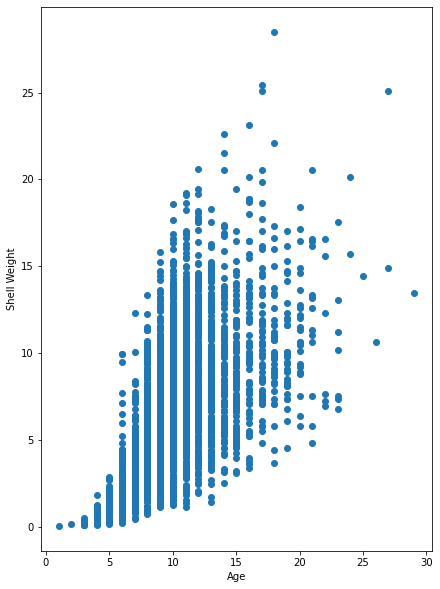

In [6]:
plt.figure(figsize=(20,5))
columns = ['Length','Diameter', 'Height','Weight', 'Shucked Weight','Viscera Weight','Shell Weight']
n = 1
for x in columns:
    plt.figure(figsize=(7,10))
    plt.scatter(data['Age'], data[x])
    plt.xlabel('Age')
    plt.ylabel(x)
    n=n+1
    plt.show()

Dari scatterplot kita bisa melihat bahwa umur mempunyai korelasi dengan fitur-fitur lain nya walaupun, tidak terlalu berkorelasi.

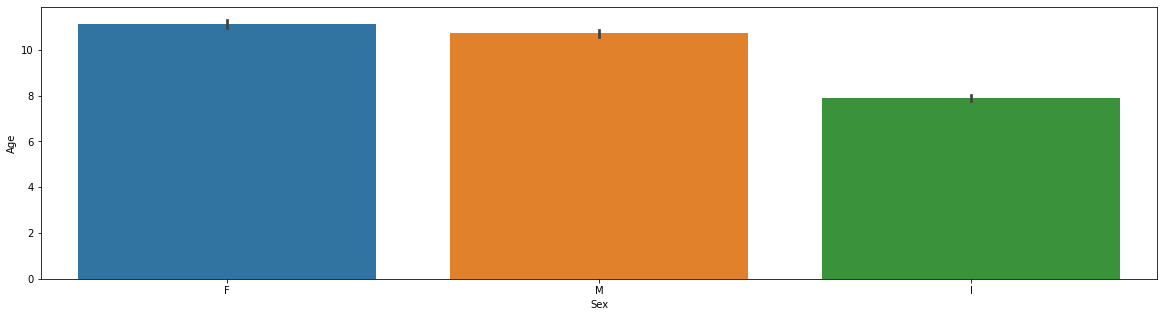

In [7]:
plt.figure(figsize=(20,5))
sns.barplot(data=data, x='Sex', y='Age')
plt.show()

dari barplot kita dapat melihat bahwa kepiting berjenis kelamin Female mempunyai umur yg lebih lama dibanding Male dan Infertebrata

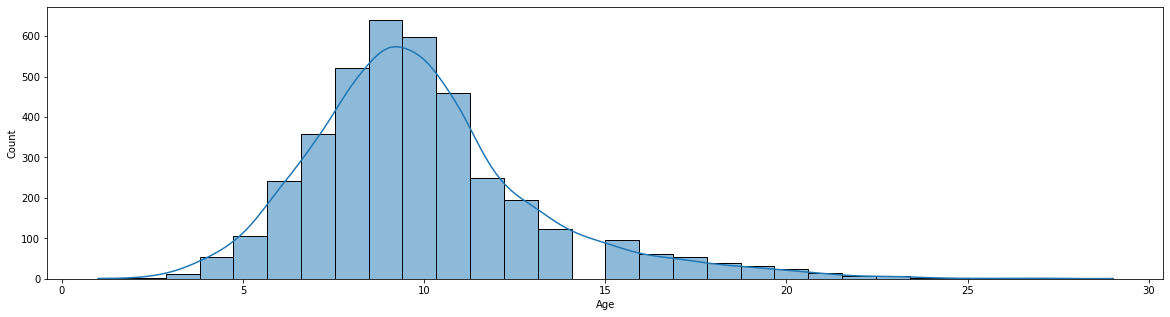

In [8]:
plt.figure(figsize=(20,5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.show()

Dari histogram plot dataset kita dapat melihat, persebaraan rataan umur kepiting berada di umur 8-10 bulan.

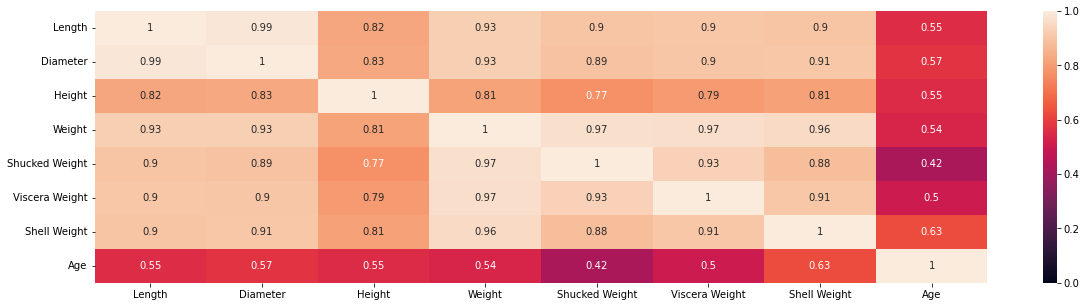

In [9]:
corr = data.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()


Dari heatmap kita dapat menyimpulkan bahwa korelasi antar column memiliki korelasi yang cukup tinggi dimana, nilai-nilai antar kolumn nya hampir mendekati 1, yang dimana jika semakin mendekati 1 maka semakin tinggi korelasi nya.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [10]:
data_inf = data.sample(25, random_state=13)
data_inf

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1165,I,1.5250,1.0625,0.3875,29.724451,14.373197,5.542327,7.767763,11
3038,M,1.5875,1.2500,0.4500,32.715323,12.487955,6.562909,10.971257,9
2262,M,1.4375,1.1250,0.4000,27.073773,12.473780,4.776891,7.654365,16
1543,M,1.1875,0.9250,0.3125,18.398826,9.837276,3.855532,4.025629,8
1775,F,1.5250,1.1875,0.3750,31.567168,14.727565,7.299996,8.519025,11
847,F,1.5500,1.2125,0.3875,33.863478,14.472420,7.682715,9.979024,9
3860,I,0.8625,0.6375,0.2125,5.684075,2.976698,1.048931,1.417475,5
2340,I,0.7500,0.5750,0.2375,3.926406,1.587572,1.034757,1.048931,6
1069,I,1.2750,1.0125,0.3250,16.981351,8.689122,3.274367,4.209901,8
2982,M,1.7625,1.3875,0.5375,60.696280,29.667752,10.857859,14.968536,11


In [11]:
data_train_test = data.drop(data_inf.index)
data_train_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [12]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.0625,0.3875,29.724451,14.373197,5.542327,7.767763,11
1,M,1.5875,1.2500,0.4500,32.715323,12.487955,6.562909,10.971257,9
2,M,1.4375,1.1250,0.4000,27.073773,12.473780,4.776891,7.654365,16
3,M,1.1875,0.9250,0.3125,18.398826,9.837276,3.855532,4.025629,8
4,F,1.5250,1.1875,0.3750,31.567168,14.727565,7.299996,8.519025,11
5,F,1.5500,1.2125,0.3875,33.863478,14.472420,7.682715,9.979024,9
6,I,0.8625,0.6375,0.2125,5.684075,2.976698,1.048931,1.417475,5
7,I,0.7500,0.5750,0.2375,3.926406,1.587572,1.034757,1.048931,6
8,I,1.2750,1.0125,0.3250,16.981351,8.689122,3.274367,4.209901,8
9,M,1.7625,1.3875,0.5375,60.696280,29.667752,10.857859,14.968536,11


## Splitting between 'X' (Features) and 'y' (target)

In [13]:
X = data_train_test.drop(['Age'], axis=1)
y = data_train_test['Age']

X

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970
...,...,...,...,...,...,...,...,...
3863,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637
3864,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577
3865,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864
3866,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698


Splitting antara fitur dan target

In [14]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (3094, 8)
Test Size : (774, 8)


In [15]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
364,I,0.7125,0.5375,0.1500,2.650678,0.878834,0.652038,0.850485
2021,I,1.0500,0.8000,0.2750,10.276694,4.932813,1.800193,2.976698
1301,M,1.1750,0.9375,0.2875,12.091062,4.776891,2.140387,4.252425
129,M,1.1250,0.8375,0.3500,13.111644,4.649318,2.154562,4.252425
2125,F,1.1625,0.8875,0.2875,13.338440,5.542327,3.345241,3.572037
...,...,...,...,...,...,...,...,...
2790,M,1.5625,1.1750,0.4375,33.424061,17.151447,7.314171,7.682715
3600,F,1.6000,1.3125,0.5375,50.433760,12.856498,8.093782,15.592225
74,I,1.4625,1.1750,0.4250,27.924257,10.475140,6.789705,8.930093
2224,F,1.2750,1.0000,0.3125,15.450477,7.399220,3.260193,3.926406


In [16]:
def diagnostic_plots(X_train, variable):
    plt.figure(figsize=(15,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()


Nilai Skewness : -0.6721358671205576


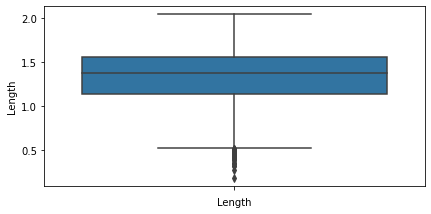

Nilai Skewness : -0.6366266875305142


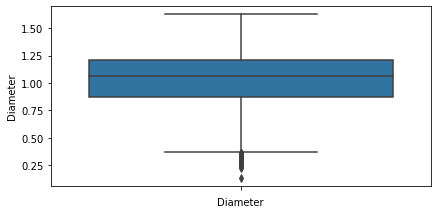

Nilai Skewness : 4.053238441750236


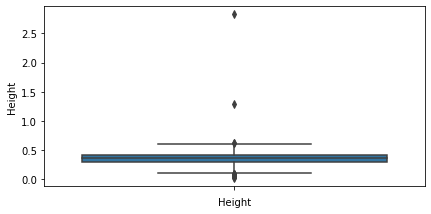

Nilai Skewness : 0.5158376684433572


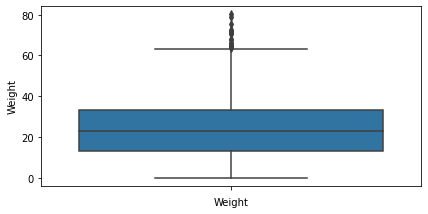

Nilai Skewness : 0.7239406071254322


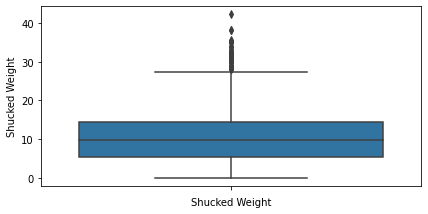

Nilai Skewness : 0.5804691492352051


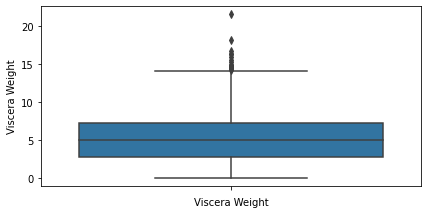

Nilai Skewness : 0.6096104909297202


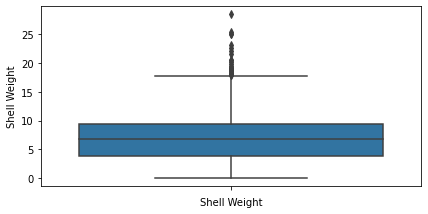

In [17]:
# buat looping untuk boxplot kolom
for i, col in enumerate(X_train.columns):
    if X_train[col].dtype != 'object':
        plt.figure(figsize=(15,35))
        print('Nilai Skewness :',X_train[col].skew())
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=X_train[col])
        plt.xlabel(col)       
        plt.show()

Melihat persebaran data dari boxplot, data memiliki outlier yang harus kita handle terlebih dahulu.

In [18]:
from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight', 'Shell Weight'])

windsorizer.fit(X_train)

X_train_ = windsorizer.transform(X_train)

Nilai Skewness : -0.6087983407658466


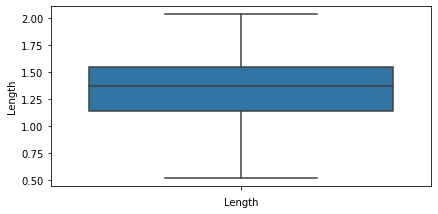

Nilai Skewness : -0.5906403097235615


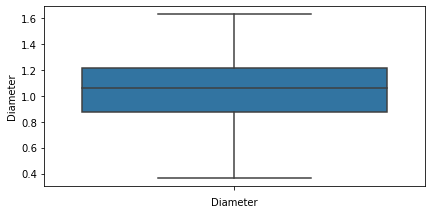

Nilai Skewness : -0.25198863743876304


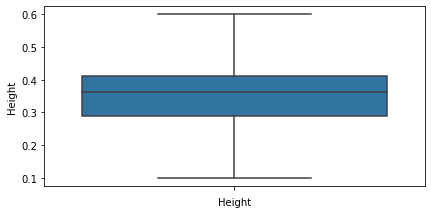

Nilai Skewness : 0.44300149281289275


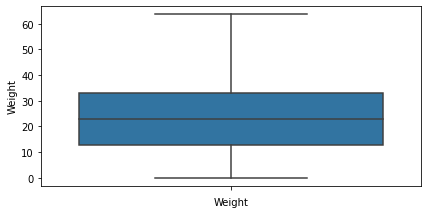

Nilai Skewness : 0.5231489055076418


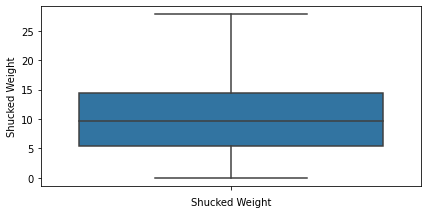

Nilai Skewness : 0.4969854314906887


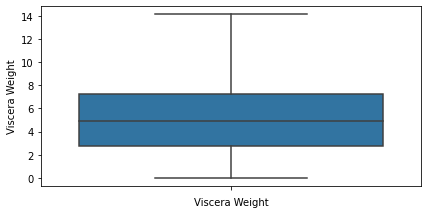

Nilai Skewness : 0.43068472499018373


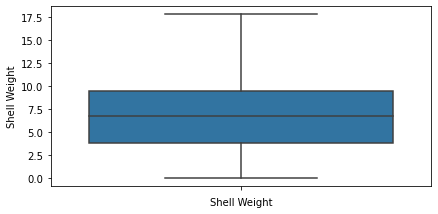

In [19]:
for i, col in enumerate(X_train_.columns):
    if X_train_[col].dtype != 'object':
        plt.figure(figsize=(15,35))
        print('Nilai Skewness :',X_train_[col].skew())
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=X_train_[col])
        plt.xlabel(col)       
        plt.show()

Data setelah di handle menggunakan winsorizer. Terlihat, data sudah tidak memiliki outlier pada tiap column nya.

In [20]:
X_train = X_train_

## Handling Missing Values

In [21]:
print('X Train Null : ', X_train.isnull().sum().sum())
print('X Test Null : ',X_test.isnull().sum().sum())
print('y Train Null : ',y_train.isnull().sum().sum())
print('y Test Null : ',y_test.isnull().sum().sum())

X Train Null :  0
X Test Null :  0
y Train Null :  0
y Test Null :  0


Tidak ada data yang memiliki missing value.

## Feature Selection

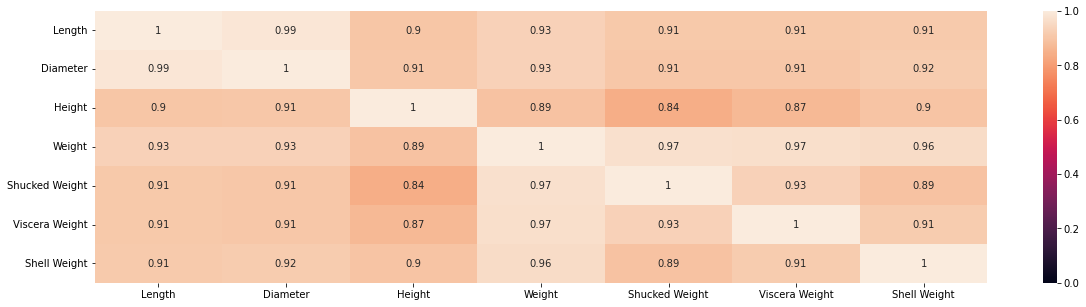

In [22]:
corr1 = X_train.corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr1, annot= True, vmin=0, vmax=1)
plt.show()

Dilihat dari heatmap nya, antar kolom memiliki korelasi yang cukup tinggi. Oleh karena itu, tidak akan dilakukan drop kolom pada dataset ini.

## Split between numerical Columns and categorical Columns

In [23]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()

print('Numerical Columns:', numerical_features)
print('Categorical Columns:', categorical_features)

Numerical Columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
Categorical Columns: ['Sex']


### Features Scaling

In [24]:
numerical_pipeline = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_pipeline = Pipeline(steps=[('ordinal', OrdinalEncoder(handle_unknown='error'))])

Menggunakan pipeline untuk scaling dan encoding.

In [25]:
numerical_pipeline.fit_transform(X_train.select_dtypes(include='number'))
numerical_pipeline.fit_transform(X_test.select_dtypes(include='number'))

array([[0.832     , 0.82524272, 0.66      , ..., 0.59170306, 0.57860465,
        0.54854369],
       [0.584     , 0.54368932, 0.54      , ..., 0.24716157, 0.38325581,
        0.20804438],
       [0.208     , 0.2038835 , 0.28      , ..., 0.03187773, 0.04930233,
        0.03467406],
       ...,
       [0.288     , 0.2815534 , 0.26      , ..., 0.04672489, 0.05302326,
        0.0631068 ],
       [0.792     , 0.87378641, 0.7       , ..., 0.49388646, 0.56      ,
        0.45076283],
       [0.304     , 0.29126214, 0.3       , ..., 0.05414847, 0.07813953,
        0.0554785 ]])

In [26]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('category', categorical_pipeline, categorical_features),
    ('number', numerical_pipeline, numerical_features)
])

In [27]:
X_train_final = full_processor.fit_transform(X_train)
X_test_final = full_processor.fit_transform(X_test)

In [28]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[categorical_features+numerical_features])
X_test_final_df = pd.DataFrame(X_test_final, columns=[categorical_features+numerical_features])
X_train_final_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.0,0.127572,0.134328,0.100,0.040800,0.030675,0.045181,0.045618
1,1.0,0.349794,0.343284,0.350,0.160749,0.176892,0.126506,0.165666
2,2.0,0.432099,0.452736,0.375,0.189287,0.171268,0.150602,0.237695
3,2.0,0.399177,0.373134,0.500,0.205340,0.166667,0.151606,0.237695
4,0.0,0.423868,0.412935,0.375,0.208907,0.198875,0.235944,0.199280
...,...,...,...,...,...,...,...,...
3089,2.0,0.687243,0.641791,0.675,0.524831,0.617587,0.517068,0.431373
3090,0.0,0.711934,0.751244,0.875,0.792375,0.462679,0.572289,0.877951
3091,1.0,0.621399,0.641791,0.650,0.438326,0.376789,0.479920,0.501801
3092,0.0,0.497942,0.502488,0.425,0.242127,0.265849,0.229920,0.219288


Data setelah dilakukan scaling dan encoding menggunakan minmax scaler dan ordinal encoding.

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### Linear Regression

In [29]:
linreg = LinearRegression(fit_intercept=True)

In [30]:
linreg_pipeline = Pipeline(steps=[('model_linreg', linreg)])

### Elastic Net

In [31]:
elastic = ElasticNet()

In [32]:
elastic_pipeline = Pipeline(steps=[('model_elastic', elastic)])

### Ridge

In [33]:
ridge = Ridge()

In [34]:
ridge_pipeline = Pipeline(steps=[('model_ridge', ridge)])

### Lasso

In [35]:
lasso = Lasso()

In [36]:
lasso_pipeline = Pipeline(steps=[('model_lasso', lasso)])

### Lars

In [37]:
lars = Lars()

In [38]:
lars_pipeline = Pipeline(steps=[('model_lars', lars)])

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Linear Regression

In [39]:
linreg_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('model_linreg', LinearRegression())])

In [40]:
preds_test_linreg = linreg_pipeline.predict(X_test_final)
preds_train_linreg = linreg_pipeline.predict(X_train_final)

### Elastic Net

In [41]:
elastic_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('model_elastic', ElasticNet())])

In [42]:
preds_test_elastic = elastic_pipeline.predict(X_test_final)
preds_train_elastic = elastic_pipeline.predict(X_train_final)

### Ridge

In [43]:
ridge_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('model_ridge', Ridge())])

In [44]:
preds_train_ridge = ridge_pipeline.predict( X_train_final)
preds_test_ridge = ridge_pipeline.predict( X_test_final)

### Lasso

In [45]:
lasso_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('model_lasso', Lasso())])

In [46]:
preds_test_lasso = lasso_pipeline.predict(X_test_final)
preds_train_lasso = lasso_pipeline.predict(X_train_final)

### Lars

In [47]:
lars_pipeline.fit(X_train_final, y_train)

c:\Users\Murijanto\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('model_lars', Lars())])

In [48]:
preds_test_lars = lars_pipeline.predict(X_test_final)

preds_train_lars = lars_pipeline.predict(X_train_final)

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil

### Menentukan model terbaik

In [49]:
mean_linreg_train = mean_absolute_error(y_train, preds_train_linreg)
mean_elastic_train = mean_absolute_error(y_train, preds_train_elastic)
mean_ridge_train = mean_absolute_error(y_train, preds_train_ridge)
mean_lasso_train = mean_absolute_error(y_train, preds_train_lasso)
mean_lars_train = mean_absolute_error(y_train, preds_train_lars)


mse_linreg_train = mean_squared_error(y_train, preds_train_linreg)
mse_elastic_train = mean_squared_error(y_train, preds_train_elastic)
mse_ridge_train = mean_squared_error(y_train, preds_train_ridge)
mse_lasso_train = mean_squared_error(y_train, preds_train_lasso)
mse_lars_train = mean_squared_error(y_train, preds_train_lars)



rmse_linreg_train = np.sqrt(mean_squared_error(y_train, preds_train_linreg))
rmse_elastic_train = np.sqrt(mean_squared_error(y_train, preds_train_elastic))
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, preds_train_ridge))
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, preds_train_lasso))
rmse_lars_train = np.sqrt(mean_squared_error(y_train, preds_train_lars))






mean_linreg_test = mean_absolute_error(y_test, preds_test_linreg)
mean_elastic_test = mean_absolute_error(y_test, preds_test_elastic)
mean_ridge_test = mean_absolute_error(y_test, preds_test_ridge)
mean_lasso_test = mean_absolute_error(y_test, preds_test_lasso)
mean_lars_test = mean_absolute_error(y_test, preds_test_lars)


mse_linreg_test = mean_squared_error(y_test, preds_test_linreg)
mse_elastic_test = mean_squared_error(y_test, preds_test_elastic)
mse_ridge_test = mean_squared_error(y_test, preds_test_ridge)
mse_lasso_test = mean_squared_error(y_test, preds_test_lasso)
mse_lars_test = mean_squared_error(y_test, preds_test_lars)



rmse_linreg_test = np.sqrt(mean_squared_error(y_test, preds_test_linreg))
rmse_elastic_test = np.sqrt(mean_squared_error(y_test, preds_test_elastic))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, preds_test_ridge))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, preds_test_lasso))
rmse_lars_test = np.sqrt(mean_squared_error(y_test, preds_test_lars))





In [50]:
crossval = {'model' : ['LinReg', 'Elastic', 'Ridge', 'Lasso', 'Lars'],
    'MAE Train' : [mean_linreg_train, mean_elastic_train, mean_ridge_train, mean_lasso_train, mean_lars_train],
    'MAE Test' : [mean_linreg_test, mean_elastic_test, mean_ridge_test, mean_lasso_test, mean_lars_test],
    'MSE Train' : [mse_linreg_train, mse_elastic_train, mse_ridge_train, mse_lasso_train, mse_lars_train],
    'MSE Test' : [mse_linreg_test, mse_elastic_test, mse_ridge_test, mse_lasso_test, mse_lars_test],
    'RMSE Train' : [rmse_linreg_train, rmse_elastic_train, rmse_ridge_train, rmse_lasso_train, rmse_lars_train],
    'RMSE Trest' : [rmse_linreg_test, rmse_elastic_test, rmse_ridge_test, rmse_lasso_test, rmse_lars_test]
   

    }

data_crossval = pd.DataFrame(crossval)
data_crossval.sort_values('MAE Train', ascending=True)

,model,MAE Train,MAE Test,MSE Train,MSE Test,RMSE Train,RMSE Trest
0,LinReg,1.619514,2.008325,4.893545,5.943120,2.212136,2.437852
4,Lars,1.619514,2.008325,4.893545,5.943120,2.212136,2.437852
2,Ridge,1.625830,1.885017,4.943817,5.412181,2.223470,2.326409
1,Elastic,2.352473,2.389707,10.504487,9.933603,3.241063,3.151762
3,Lasso,2.352473,2.389707,10.504487,9.933603,3.241063,3.151762


Dari data model evaluation kita mendapatkan beberapa data : 
- MAE untuk melihat nilai jarak rata-rata dan prediksi error
- MSE untuk melihat nilai kesalahan pada proses prediksi
- RMSE untuk melihat seberapa jauh nilai yang diprediksi dengan nilai actual nya

Pemilihan Model :

- Dilihat dari MSE nya, Model Linear Regression memiliki nilai error yang paling rendah dan perbedaan antara Train dan Test nya tidak terlalu jauh dengan Train 1.6 bulan dan Test 2.47 bulan.

- Dilihat dari MSE nya, model Linear Regression memiliki nilai error yang paling rendah diantara data Train lain nya, tetapi perbedaan dengan Test nya cukup jauh.

- Dilihat dari RMSE nya model Linear Regression memiliki nilai yang paling kecil untuk data Train nya.

Oleh karena itu untuk pemodelan akan menggunakan Linear Regression karena faktor-faktor yang sudah disebutkan diatas.

# 9. Model Saving

Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [51]:
# menyimpan data
import joblib
import json

with open('model_linreg.pkl', 'wb') as file_1:
  joblib.dump(linreg_pipeline, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(numerical_pipeline, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(categorical_pipeline, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(numerical_features, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(categorical_features, file_5)

# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [52]:
with open('model_linreg.pkl', 'rb') as file_1:
  model_linreg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  df_num_columns = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  df_cat_columns = json.load(file_5)

In [53]:
data_inf

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.0625,0.3875,29.724451,14.373197,5.542327,7.767763,11
1,M,1.5875,1.2500,0.4500,32.715323,12.487955,6.562909,10.971257,9
2,M,1.4375,1.1250,0.4000,27.073773,12.473780,4.776891,7.654365,16
3,M,1.1875,0.9250,0.3125,18.398826,9.837276,3.855532,4.025629,8
4,F,1.5250,1.1875,0.3750,31.567168,14.727565,7.299996,8.519025,11
5,F,1.5500,1.2125,0.3875,33.863478,14.472420,7.682715,9.979024,9
6,I,0.8625,0.6375,0.2125,5.684075,2.976698,1.048931,1.417475,5
7,I,0.7500,0.5750,0.2375,3.926406,1.587572,1.034757,1.048931,6
8,I,1.2750,1.0125,0.3250,16.981351,8.689122,3.274367,4.209901,8
9,M,1.7625,1.3875,0.5375,60.696280,29.667752,10.857859,14.968536,11


In [64]:
data_inf_num = data_inf[df_num_columns]
data_inf_cat = data_inf[df_cat_columns]

data_inf_cat

,Sex
0,I
1,M
2,M
3,M
4,F
5,F
6,I
7,I
8,I
9,M


In [55]:
#Feature scaling dan encoding
df_inf_num_scaled = model_scaler.fit_transform(data_inf_num)
df_inf_cat_encoded = model_encoder.fit_transform(data_inf_cat)

df_inf_cat_encoded


array([[1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.]])

In [56]:
data_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)
data_inf_final

array([[7.04545455e-01, 5.65217391e-01, 5.18518519e-01, 4.54431960e-01,
        4.55325593e-01, 3.24489796e-01, 4.36464088e-01, 1.00000000e+00],
       [7.61363636e-01, 7.82608696e-01, 7.03703704e-01, 5.07116105e-01,
        3.88187784e-01, 3.97959184e-01, 6.44567219e-01, 2.00000000e+00],
       [6.25000000e-01, 6.37681159e-01, 5.55555556e-01, 4.07740325e-01,
        3.87682988e-01, 2.69387755e-01, 4.29097606e-01, 2.00000000e+00],
       [3.97727273e-01, 4.05797101e-01, 2.96296296e-01, 2.54931336e-01,
        2.93791015e-01, 2.03061224e-01, 1.93370166e-01, 2.00000000e+00],
       [7.04545455e-01, 7.10144928e-01, 4.81481481e-01, 4.86891386e-01,
        4.67945482e-01, 4.51020408e-01, 4.85267035e-01, 0.00000000e+00],
       [7.27272727e-01, 7.39130435e-01, 5.18518519e-01, 5.27340824e-01,
        4.58859162e-01, 4.78571429e-01, 5.80110497e-01, 0.00000000e+00],
       [1.02272727e-01, 7.24637681e-02, 0.00000000e+00, 3.09612984e-02,
        4.94699647e-02, 1.02040816e-03, 2.39410681e-02, 1.

In [57]:
y_pred_inf = model_linreg.predict(data_inf_final)
y_pred_inf

array([15.67024371, 19.13103288, 21.6725637 , 20.42892657,  6.46847546,
        5.62530228, 11.99438168, 11.6228128 , 14.07220047, 27.15157489,
       15.4538903 , 12.16264976,  6.24174148,  3.83029892, 22.71679769,
       12.30118696,  5.88857708, 11.07343226,  5.87026874,  9.07538756,
        1.71328075, 10.39797005,  5.77210661,  5.95611126, 16.50412311])

In [58]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Age Prediction'])
y_pred_inf_df

,Age Prediction
0,15.670244
1,19.131033
2,21.672564
3,20.428927
4,6.468475
5,5.625302
6,11.994382
7,11.622813
8,14.072200
9,27.151575


In [59]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Age Prediction
0,I,1.5250,1.0625,0.3875,29.724451,14.373197,5.542327,7.767763,11,15.670244
1,M,1.5875,1.2500,0.4500,32.715323,12.487955,6.562909,10.971257,9,19.131033
2,M,1.4375,1.1250,0.4000,27.073773,12.473780,4.776891,7.654365,16,21.672564
3,M,1.1875,0.9250,0.3125,18.398826,9.837276,3.855532,4.025629,8,20.428927
4,F,1.5250,1.1875,0.3750,31.567168,14.727565,7.299996,8.519025,11,6.468475
5,F,1.5500,1.2125,0.3875,33.863478,14.472420,7.682715,9.979024,9,5.625302
6,I,0.8625,0.6375,0.2125,5.684075,2.976698,1.048931,1.417475,5,11.994382
7,I,0.7500,0.5750,0.2375,3.926406,1.587572,1.034757,1.048931,6,11.622813
8,I,1.2750,1.0125,0.3250,16.981351,8.689122,3.274367,4.209901,8,14.072200
9,M,1.7625,1.3875,0.5375,60.696280,29.667752,10.857859,14.968536,11,27.151575


# 11. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

- Dari Scatterplot kita dapat menyimpulkan bahwa fitur dan target memiliki korelasi yang cukup tinggi, tetapi tidak terlepas dari adanya outlier di beberapa column.
- Dari Heatmap dapat disimpulkan bahwa memang benar column-column dalam dataset memiliki korelasi yang cukup tinggi antar column nya.
- Hasil Pemodelan menggunakan 5 model di dapatkan :
    -                   MAE Train	    MAE Test	MSE Train	MSE Test	RMSE Train	RMSE Trest
    -       LinReg      1.619514	    2.008325	4.893545	5.943120	2.212136	2.437852
    -       Lars        1.619514	    2.008325	4.893545	5.943120	2.212136	2.437852
    -       Ridge       1.625830	    1.885017	4.943817	5.412181	2.223470	2.326409
    -       Elastic     2.352473	    2.389707	10.504487	9.933603	3.241063	3.151762
    -       Lasso       2.352473	    2.389707	10.504487	9.933603	3.241063	3.151762

Dari data model evaluation kita mendapatkan beberapa data : 
- MAE untuk melihat nilai jarak rata-rata dan prediksi error
- MSE untuk melihat nilai kesalahan pada proses prediksi
- RMSE untuk melihat seberapa jauh nilai yang diprediksi dengan nilai actual nya

Dari data diatas dipilih model terbaik yaitu Linear Regression, dengan MAE antar Train dan Test nya hanya berbeda sedikit, MSE yang paling rendah dan RMSE yang paling rendah.

Hasil dari percobaan dengan data inference, Model linear regression mampu memprediksi umur dari kepiting, walaupun masih ada beberapa data prediksi yang jauh dari nilai seharusnya, karena percobaan hanya menggunakan 25 data saja maka masih dapat dimaklumi.